In [40]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" ) 
# Load the pokemon dataset
df = pd.read_csv('movie_metadata.csv')  
df.shape

Python 3.11.2 (main, Feb 16 2023, 02:55:59) [Clang 14.0.0 (clang-1400.0.29.202)]
Pandas 1.5.3
NumPy 1.24.2


(5043, 28)

In [41]:
#1. ปัจจัยที่ส่งผลต่อ ค่าrating IMDB (runtime, actor, director, etc. )
df = df.dropna()
df = df.reset_index(drop=True)
df.shape


(3756, 28)

In [42]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
3752,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
3753,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3754,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [43]:
df['actor_2_name'].unique()

array(['Joel David Moore', 'Orlando Bloom', 'Rory Kinnear', ...,
       'David Sullivan', 'Peter Marquardt', 'Brian Herzlinger'],
      dtype=object)

In [44]:
df_select = df.drop(['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','cast_total_facebook_likes','facenumber_in_poster','movie_imdb_link','num_user_for_reviews','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes'], axis=1)

In [45]:
df_select.sort_values('imdb_score', ascending=False )['imdb_score'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8,
       2.7, 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.6])

In [46]:
dfsort = df.sort_values( 'title_year', ascending=False )['title_year'].unique()

In [47]:
dfsort

array([2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008.,
       2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964., 1963.,
       1962., 1961., 1960., 1959., 1957., 1954., 1953., 1952., 1950.,
       1948., 1947., 1946., 1940., 1939., 1937., 1936., 1935., 1933.,
       1929., 1927.])

In [48]:
df1 = df[df['movie_facebook_likes'] != 0]


In [49]:
df2 = df[df['imdb_score'] == 0]


In [50]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

/var/folders/6c/_rdwrvxj3lv4sybrpl8l5wqm0000gn/T/ipykernel_44958/230392161.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'],kde=False, color=['red'])


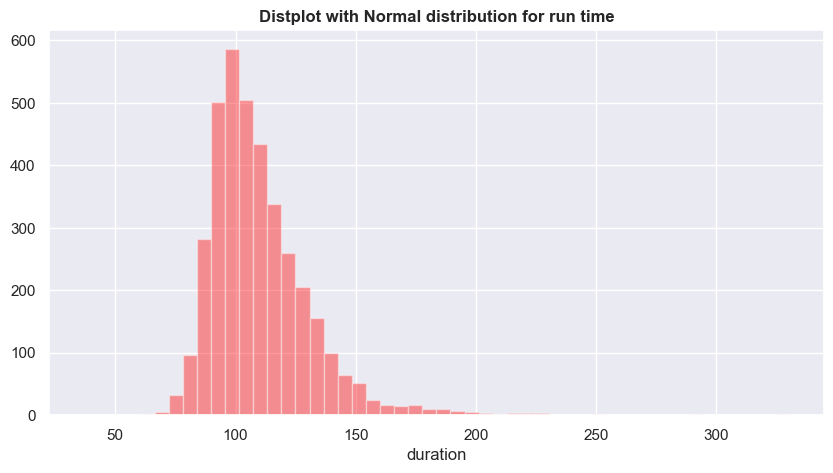

In [51]:
# Plot Normal distribution : duration
plt.figure(figsize=(10,5))
sns.distplot(df['duration'],kde=False, color=['red'])
plt.title('Distplot with Normal distribution for run time',fontweight="bold")
plt.show()

TypeError: 'float' object cannot be interpreted as an integer

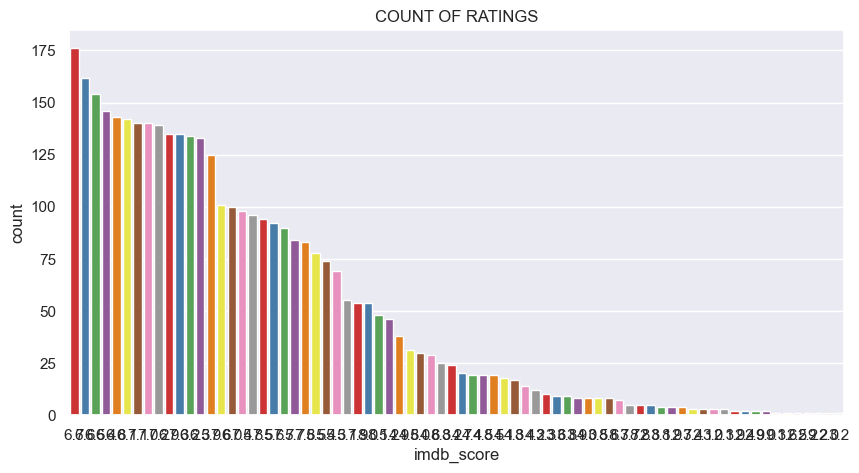

In [52]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
px = sns.countplot(x="imdb_score", data=df,palette="Set1",  order=df['imdb_score'].value_counts().index[0:])
plt.title("COUNT OF RATINGS")
px.set_xticks(range(0,10,0.5))

#ต้อง group by rating ก่อนหรอ?

In [ ]:
#2. หนังประเภทไหน มีbudget ในการทำสูง
df2_split = df['genres'].str.split('|', expand=True)
df2_split


,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Action,Adventure,Sci-Fi,None,None,None,None,None
...,...,...,...,...,...,...,...,...
3751,Drama,Music,Romance,None,None,None,None,None
3752,Drama,None,None,None,None,None,None,None
3753,Drama,Sci-Fi,Thriller,None,None,None,None,None
3754,Action,Crime,Drama,Romance,Thriller,None,None,None


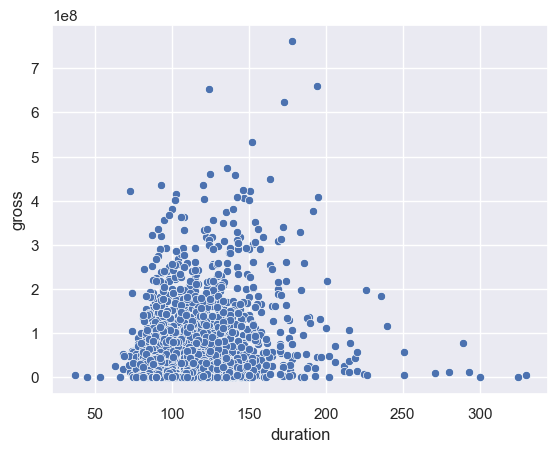

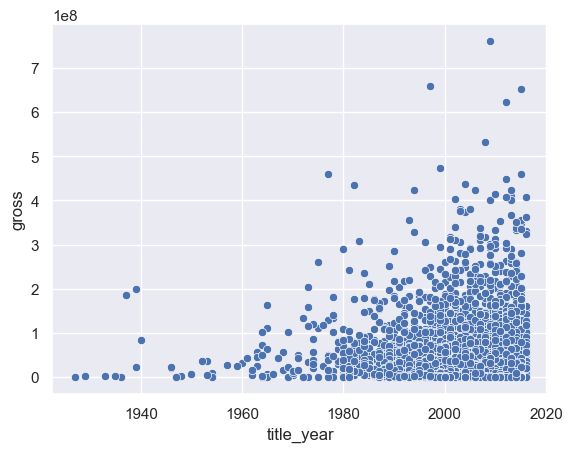

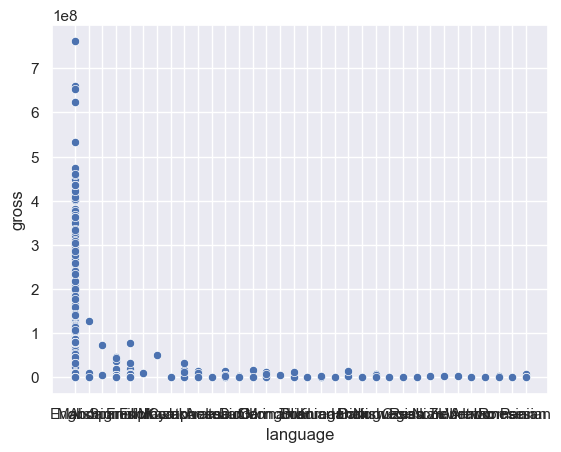

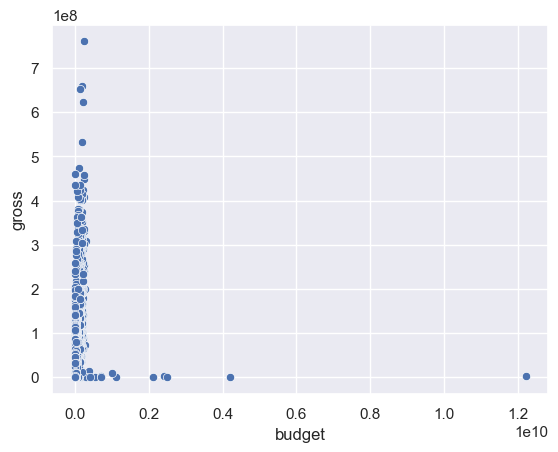

In [ ]:
c=["duration","title_year","language", "budget"]
#plt.figure(figsize=(15,7))
for a in c:
    sns.scatterplot(y="gross",x=a,data=df)
   
    
    plt.show()

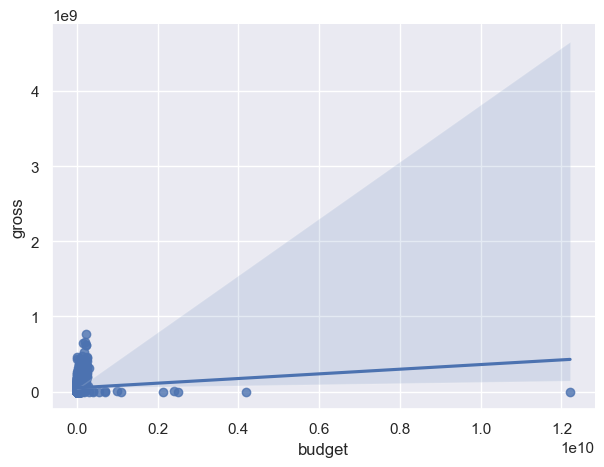

In [ ]:
g = sns.regplot(x = 'budget', y='gross' , data = df)
# remove the top and right line in graph
sns.despine()
# Set the size of the graph from here
g.figure.set_size_inches(7,5)

In [ ]:
column_data = df2_split.iloc[:, 7]
column_data

NameError: name 'df2_split' is not defined

In [ ]:
print('Hello')

Hello


In [ ]:
column_data.unique()

array([None, 'Romance', 'Thriller'], dtype=object)

<AxesSubplot: >

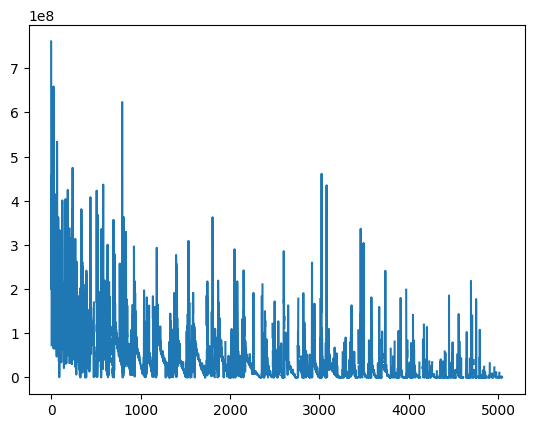

In [ ]:
#3. หนังที่มี budget สูง จะมี gross profit สูงตามหรือไม่ มี margin เท่าไหร่
df['gross'].plot()   

<Axes: xlabel='imdb_score', ylabel='count'>

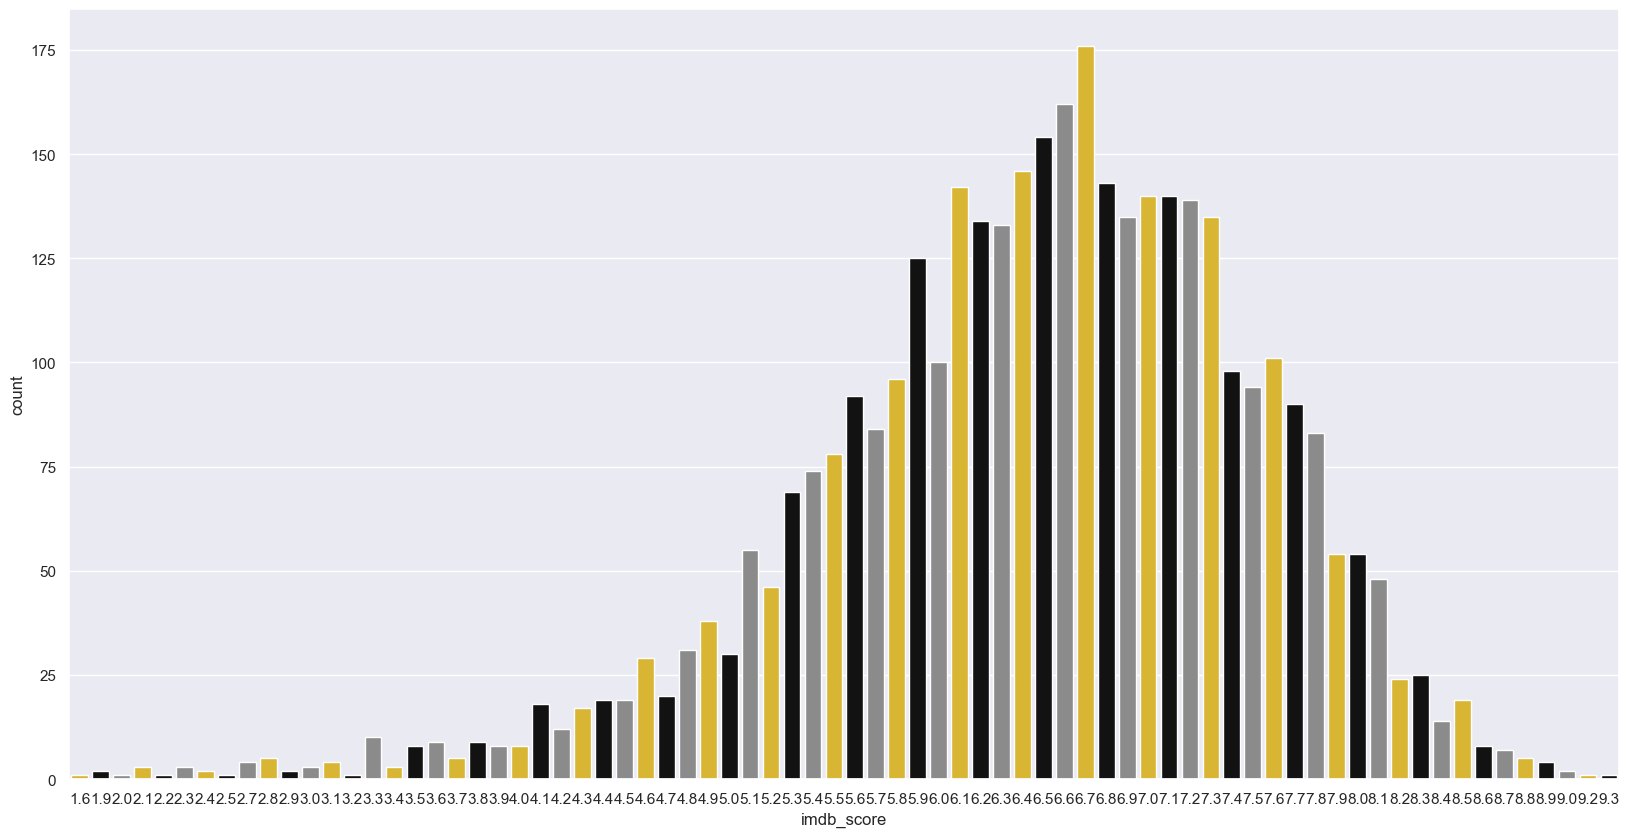

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='imdb_score',palette =['#f5c518', '#121212','#8b8b8b'], data = df)

#จัด grouping ยังไง?

In [ ]:
#4.หนังของประเทศไหน ได้รับความนิยมสูง

In [ ]:
#5. เทรนด์หนัง ในแต่ละปี
